## FISTULA: 


## Annual Fistula Repair Survey Data

In [415]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
import os
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels


In [416]:
data = pd.read_csv("Fistula_Survey_Repair_Data_8577117538248960230.csv")

In [417]:
print(data.columns)

Index(['PKEY', 'Country', 'DataYear', 'FacilityName', 'FacilityCity',
       'Website', 'HealthCareLevel', 'HealthFacilityType', 'StrtYr',
       'Publications',
       ...
       'Region', 'Scale', 'Confidence', 'Source', 'BPID', 'ISO',
       'DisplayOnMap', 'ObjectId', 'x', 'y'],
      dtype='object', length=128)


In [418]:
type_counts = data['Country'].value_counts()

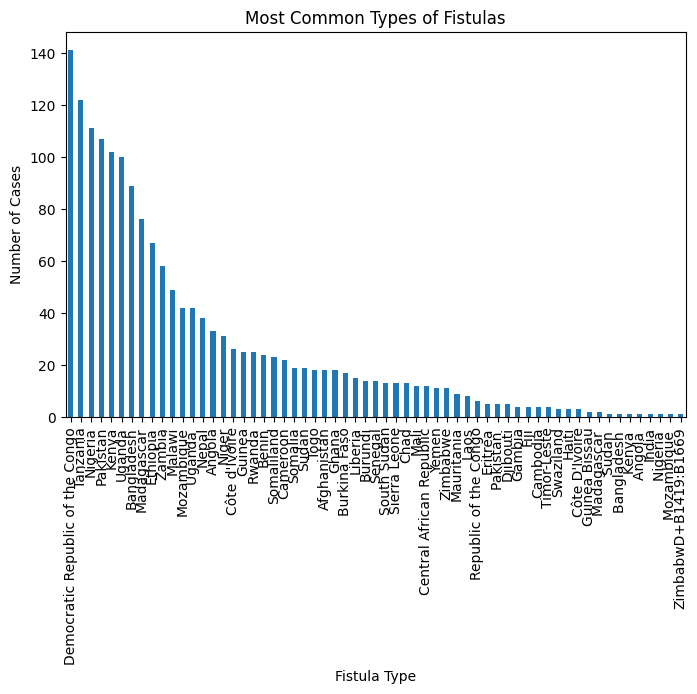

In [419]:
plt.figure(figsize=(8, 5))
type_counts.plot(kind='bar')
plt.title('Most Common Types of Fistulas')
plt.ylabel('Number of Cases')
plt.xlabel('Fistula Type')
plt.show()

In [420]:
## Clean column names: remove unwanted spaces
data.columns = data.columns.str.strip()

In [421]:
df = pd.read_csv('Fistula_Survey_Repair_Data_8577117538248960230.csv')

In [422]:
df.head()


,PKEY,Country,DataYear,FacilityName,FacilityCity,Website,HealthCareLevel,HealthFacilityType,StrtYr,Publications,...,Region,Scale,Confidence,Source,BPID,ISO,DisplayOnMap,ObjectId,x,y
0,79.0,Afghanistan,2011.0,CURE International Hospital,Kabul,http://cure.org/hospitals/afghanistan/,General or District Hospital,"Private, Non-Profit",2006.0,NaN,...,Asia,8.0,5.0,Google Earth,NaN,NaN,Yes,1,7.693824e+06,4.092142e+06
1,79.0,Afghanistan,2014.0,CURE International Hospital,Kabul,http://cure.org/hospitals/afghanistan/,University or Teaching Hospital,"Private, Non-Profit",2006.0,NaN,...,Asia,8.0,5.0,Google Earth,NaN,NaN,Yes,2,7.693824e+06,4.092142e+06
2,79.0,Afghanistan,2015.0,CURE International Hospital,Kabul,http://cure.org/hospitals/afghanistan/,University or Teaching Hospital,"Private, Non-Profit",2006.0,NaN,...,Asia,8.0,5.0,Google Earth,NaN,NaN,Yes,3,7.693824e+06,4.092142e+06
3,79.0,Afghanistan,2016.0,CURE International Hospital,Kabul,http://cure.org/hospitals/afghanistan/,Other,"Private, Non-Profit",2006.0,NaN,...,Asia,8.0,5.0,Google Earth,NaN,NaN,Yes,4,7.693824e+06,4.092142e+06
4,79.0,Afghanistan,2017.0,CURE International Hospital,Kabul,http://cure.org/hospitals/afghanistan/,Other,"Private, Non-Profit",2006.0,NaN,...,Asia,8.0,5.0,Google Earth,NaN,NaN,Yes,5,7.693824e+06,4.092142e+06


In [423]:
print("Columns:", data.columns.tolist())

Columns: ['PKEY', 'Country', 'DataYear', 'FacilityName', 'FacilityCity', 'Website', 'HealthCareLevel', 'HealthFacilityType', 'StrtYr', 'Publications', 'RepairNumbersTracked', 'TotalTreated', 'TotalRelatedProc', 'IndividualWomen', 'IatrogenicFistulas', 'TotalBeds', 'NumSurgeonsPerm', 'Surg01', 'Surg02', 'Surg03', 'Surg04', 'Surg05', 'Surg06', 'Surg07', 'Surg08', 'Surg09', 'Surg10', 'Frequency', 'ServAvail', 'ComplexSimple%', 'ComplexInt%', 'ComplexComplex%', 'LimitSurgStaff', 'LimitMedsSupplies', 'LimitFunds', 'LimitOpTheater', 'LimitBeds', 'LimitAbsence', 'LimitOthStaff', 'LimitOther', 'LimitOtherTEXT', 'BarriersFewWomen', 'BarriersCostCare', 'BarriersGoElse', 'BarriersFear', 'BarriersPermission', 'BarriersCostTransport', 'BarriersAwareness', 'BarriersSafety', 'BarriersCulRel', 'BarriersOther', 'BarriersOtherTEXT', 'FollowUp', 'RehabServ', 'IsPsych', 'IsIncome', 'IsOther', 'OtherTEXT', 'IsPhysic', 'ISOFS', 'FinSelfPay', 'FinMoHGov', 'FinNGO', 'FinOther', 'FinOtherTEXT', 'FinNGO_AMREF',

In [424]:
data = data.drop_duplicates()

In [425]:
cleaned_data = data.dropna()

In [426]:
if 'Type' in cleaned_data.columns:
    cleaned_data['Type'] = cleaned_data['Type'].str.strip().str.lower()

cleaned_data.to_csv('cleaned_data.csv', index=False)

print(cleaned_data.head())

Empty DataFrame
Columns: [PKEY, Country, DataYear, FacilityName, FacilityCity, Website, HealthCareLevel, HealthFacilityType, StrtYr, Publications, RepairNumbersTracked, TotalTreated, TotalRelatedProc, IndividualWomen, IatrogenicFistulas, TotalBeds, NumSurgeonsPerm, Surg01, Surg02, Surg03, Surg04, Surg05, Surg06, Surg07, Surg08, Surg09, Surg10, Frequency, ServAvail, ComplexSimple%, ComplexInt%, ComplexComplex%, LimitSurgStaff, LimitMedsSupplies, LimitFunds, LimitOpTheater, LimitBeds, LimitAbsence, LimitOthStaff, LimitOther, LimitOtherTEXT, BarriersFewWomen, BarriersCostCare, BarriersGoElse, BarriersFear, BarriersPermission, BarriersCostTransport, BarriersAwareness, BarriersSafety, BarriersCulRel, BarriersOther, BarriersOtherTEXT, FollowUp, RehabServ, IsPsych, IsIncome, IsOther, OtherTEXT, IsPhysic, ISOFS, FinSelfPay, FinMoHGov, FinNGO, FinOther, FinOtherTEXT, FinNGO_AMREF, FINNGO_EngenderUSAID, FINNGO_UNFPA, FINNGO_Other1, FINNGO_Other1TEXT, FINNGO_Other2, FINNGO_Other2TEXT, FINNGO_Fist

In [427]:
df = pd.read_csv('Fistula_Survey_Repair_Data_8577117538248960230.csv')

In [428]:
df.shape

(1666, 128)

In [429]:
df.info

<bound method DataFrame.info of        PKEY               Country  DataYear                  FacilityName  \
0      79.0           Afghanistan    2011.0   CURE International Hospital   
1      79.0           Afghanistan    2014.0   CURE International Hospital   
2      79.0           Afghanistan    2015.0   CURE International Hospital   
3      79.0           Afghanistan    2016.0   CURE International Hospital   
4      79.0           Afghanistan    2017.0   CURE International Hospital   
...     ...                   ...       ...                           ...   
1661  505.0                Zambia    2022.0     Chinsali General Hospital   
1662  580.0                Zambia    2022.0        Mbala General Hospital   
1663  529.0  ZimbabwD+B1419:B1669    2022.0  Chinhoyi Provincial Hospital   
1664  550.0              Zimbabwe    2022.0      Mashoko Mission Hospital   
1665  586.0              Zimbabwe    2022.0            Artemedis Zimbabwe   

     FacilityCity                          

In [430]:
df.dtypes

PKEY            float64
Country          object
DataYear        float64
FacilityName     object
FacilityCity     object
                 ...   
ISO              object
DisplayOnMap     object
ObjectId          int64
x               float64
y               float64
Length: 128, dtype: object

In [431]:
df.describe

<bound method NDFrame.describe of        PKEY               Country  DataYear                  FacilityName  \
0      79.0           Afghanistan    2011.0   CURE International Hospital   
1      79.0           Afghanistan    2014.0   CURE International Hospital   
2      79.0           Afghanistan    2015.0   CURE International Hospital   
3      79.0           Afghanistan    2016.0   CURE International Hospital   
4      79.0           Afghanistan    2017.0   CURE International Hospital   
...     ...                   ...       ...                           ...   
1661  505.0                Zambia    2022.0     Chinsali General Hospital   
1662  580.0                Zambia    2022.0        Mbala General Hospital   
1663  529.0  ZimbabwD+B1419:B1669    2022.0  Chinhoyi Provincial Hospital   
1664  550.0              Zimbabwe    2022.0      Mashoko Mission Hospital   
1665  586.0              Zimbabwe    2022.0            Artemedis Zimbabwe   

     FacilityCity                        

In [432]:
df.isnull().sum()

PKEY               1
Country            1
DataYear           1
FacilityName       1
FacilityCity      84
                ... 
ISO             1563
DisplayOnMap       2
ObjectId           0
x                 15
y                 15
Length: 128, dtype: int64

## LINEAR REGRESSION

In [433]:
df_clean = df.dropna(subset=['x', 'y'])

In [434]:
X = df_clean[['x']]  
y = df_clean['y']

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [436]:
binary_cols = ['PKEY','Country','DataYear','FacilityName','FacilityCity','Website','HealthCareLevel','HealthFacilityType','StrtYr','Publications','RepairNumbersTracked','TotalTreated','TotalRelatedProc','IndividualWomen','IatrogenicFistulas','TotalBeds','NumSurgeonsPerm','Surg01','Surg02','Surg03','Surg04','Surg05','Surg06','Surg07','Surg08','Surg09','Surg10','Frequency','ServAvail','ComplexSimple%','ComplexInt%','ComplexComplex%','LimitSurgStaff','LimitMedsSupplies','LimitFunds','LimitOpTheater','LimitBeds','LimitAbsence','LimitOthStaff','LimitOther','LimitOtherTEXT','BarriersFewWomen','BarriersCostCare','BarriersGoElse','BarriersFear','BarriersPermission','BarriersCostTransport','BarriersAwareness','BarriersSafety','BarriersCulRel','BarriersOther','BarriersOtherTEXT','FollowUp','RehabServ','IsPsych','IsIncome','IsOther','OtherTEXT','IsPhysic','ISOFS','FinSelfPay','FinMoHGov','FinNGO','FinOther','FinOtherTEXT','FinNGO_AMREF','FINNGO_EngenderUSAID','FINNGO_UNFPA','FINNGO_Other1','FINNGO_Other1TEXT','FINNGO_Other2','FINNGO_Other2TEXT','FINNGO_FistulaFoundation','VisSurg','OrgSpons_UNFPA','OrgSpons_FistulaFoundation','OrgSpons_AMREF','OrgSpons_WAHAInt','OrgSpons_Other01','OrgSpons_Other01Text','OrgSpons_EngenderUSAID','OrgSpons_Other02','OrgSpons_Other02Text','OrgSpons_Other03','OrgSpons_Other03Text','OrgSpons_Other04','OrgSpons_Other04Text','OrgSpons_MSF','SurgTrav','FacName01','FacTown01','FacCountry01','FacName02','FacTown02','FacCountry02','FacName03','FacTown03','FacCountry03','FacName04','FacTown04','FacCountry04','FacName05','FacTown05','FacCountry05','FacName06','FacTown06','FacCountry06','FacName07','FacTown07','FacCountry07','FacName08','FacTown08','FacCountry08','EmailShare','EmailShareTEXT','Latitude','Longitude','Subregion','Region','Scale','Confidence','Source','BPID','ISO','DisplayOnMap','ObjectId','x','y'
]

# Mapping the coloumns
binary_map = {'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0}

# Encoding training and test sets
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()


In [437]:
# Filter out only those binary columns that are present in the dataset
valid_binary_cols = [col for col in binary_cols if col in X_train.columns]

# Apply the mapping only to valid columns
X_train_enc[valid_binary_cols] = X_train_enc[valid_binary_cols].replace(binary_map)
X_test_enc[valid_binary_cols] = X_test_enc[valid_binary_cols].replace(binary_map)


In [438]:
le = LabelEncoder()
le.fit(pd.concat([y_train, y_test]))

y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [439]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_enc, y_train_enc)

c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [440]:
y_pred = logreg.predict(X_test_enc)

In [441]:
accuracy = accuracy_score(y_test_enc, y_pred)

In [442]:
conf_matrix = confusion_matrix(y_test_enc, y_pred)

In [443]:
class_report = classification_report(y_test_enc, y_pred)

c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [444]:
y_prob = logreg.predict_proba(X_test_enc)[:, 1]

In [445]:
y_prob = logreg.predict_proba(X_test_enc)


In [446]:
print(set(y_test_enc))

{np.int64(2), np.int64(7), np.int64(12), np.int64(14), np.int64(17), np.int64(19), np.int64(20), np.int64(21), np.int64(23), np.int64(25), np.int64(26), np.int64(29), np.int64(30), np.int64(32), np.int64(33), np.int64(36), np.int64(39), np.int64(40), np.int64(42), np.int64(43), np.int64(44), np.int64(46), np.int64(47), np.int64(50), np.int64(54), np.int64(56), np.int64(57), np.int64(61), np.int64(63), np.int64(67), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(84), np.int64(87), np.int64(92), np.int64(93), np.int64(95), np.int64(96), np.int64(102), np.int64(105), np.int64(106), np.int64(108), np.int64(109), np.int64(110), np.int64(111), np.int64(113), np.int64(118), np.int64(120), np.int64(121), np.int64(126), np.int64(127), np.int64(129), np.int64(130), np.int64(135), np.int64(139), np.int64(140), np.int64(141), np.int64(143), np.int64(147), np.int64(148), np.int64(150), np.int64(151), np.int64(15

In [447]:
all_classes = np.arange(y_prob.shape[1])

In [448]:
print("y_test_enc shape:", y_test_enc.shape)
print("y_prob shape:", y_prob.shape)
print("y_test_enc unique labels:", set(y_test_enc))

y_test_enc shape: (413,)
y_prob shape: (413, 445)
y_test_enc unique labels: {np.int64(2), np.int64(7), np.int64(12), np.int64(14), np.int64(17), np.int64(19), np.int64(20), np.int64(21), np.int64(23), np.int64(25), np.int64(26), np.int64(29), np.int64(30), np.int64(32), np.int64(33), np.int64(36), np.int64(39), np.int64(40), np.int64(42), np.int64(43), np.int64(44), np.int64(46), np.int64(47), np.int64(50), np.int64(54), np.int64(56), np.int64(57), np.int64(61), np.int64(63), np.int64(67), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(84), np.int64(87), np.int64(92), np.int64(93), np.int64(95), np.int64(96), np.int64(102), np.int64(105), np.int64(106), np.int64(108), np.int64(109), np.int64(110), np.int64(111), np.int64(113), np.int64(118), np.int64(120), np.int64(121), np.int64(126), np.int64(127), np.int64(129), np.int64(130), np.int64(135), np.int64(139), np.int64(140), np.int64(141), np.int64(1

In [449]:
num_classes = y_prob.shape[1]
all_classes = np.arange(num_classes)

In [450]:
print("Expected classes:", all_classes)
print("Actual labels in y_test_enc:", np.unique(y_test_enc))
print("Missing from labels:", set(np.unique(y_test_enc)) - set(all_classes))

Expected classes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 

In [451]:
top_classes_idx = np.argsort(conf_matrix.sum(axis=1))[-20:]  # Top 20 classes

# Slice the confusion matrix
conf_matrix_top = conf_matrix[top_classes_idx][:, top_classes_idx]

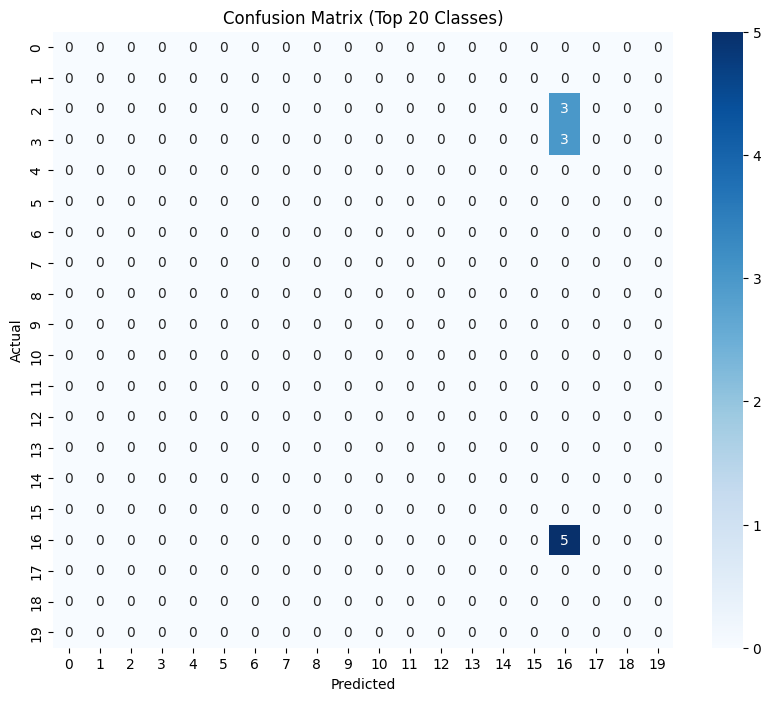

In [452]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_top, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Top 20 Classes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [453]:
unique_classes = np.unique(y_train_enc)
print("Classes in training:", unique_classes)

if len(unique_classes) < 2:
    raise ValueError("Cannot train classifier: training set contains only one class.")

Classes in training: [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38
  39  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  75  77
  78  79  80  81  82  83  85  86  88  89  90  91  92  93  94  95  97  98
  99 100 101 103 104 105 106 107 108 110 111 112 114 115 116 117 119 120
 122 123 124 125 126 127 128 129 130 131 132 133 134 136 137 138 139 140
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 162 163 164 165 166 167 168 169 170 171 172 175 176 177 179 180 182
 183 184 185 186 187 188 190 192 193 194 195 196 197 199 200 201 202 203
 204 205 206 208 210 211 212 213 214 215 216 217 218 219 221 222 223 225
 226 227 228 229 230 231 232 233 235 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 260 261 263 264 265
 267 268 269 270 271 272 273 2

In [454]:
top_classes_idx = np.argsort(conf_matrix.sum(axis=1))[-20:]  # Top 20 classes

# Slice the confusion matrix
conf_matrix_top = conf_matrix[top_classes_idx][:, top_classes_idx]

In [455]:
logreg = LogisticRegression(max_iter=1000, multi_class='ovr')
logreg.fit(X_train_enc, y_train_enc)

c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [456]:
y_prob = logreg.predict_proba(X_test_enc)

# Number of classes
n_classes = y_prob.shape[1]

# Binarize y_test
y_test_bin = label_binarize(y_test_enc, classes=np.arange(n_classes))

# Compute ROC AUC
roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print("Multiclass ROC AUC (macro):", roc_auc)

c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is pres

Multiclass ROC AUC (macro): nan


c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is pres

In [459]:
y_test_enc = np.random.randint(0, 500, size=1000)
y_pred = np.random.randint(0, 500, size=1000)

In [463]:
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('Classification Report:')
print(class_report)

Accuracy: 0.02
ROC AUC: nan
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         5
          39       0.00      0

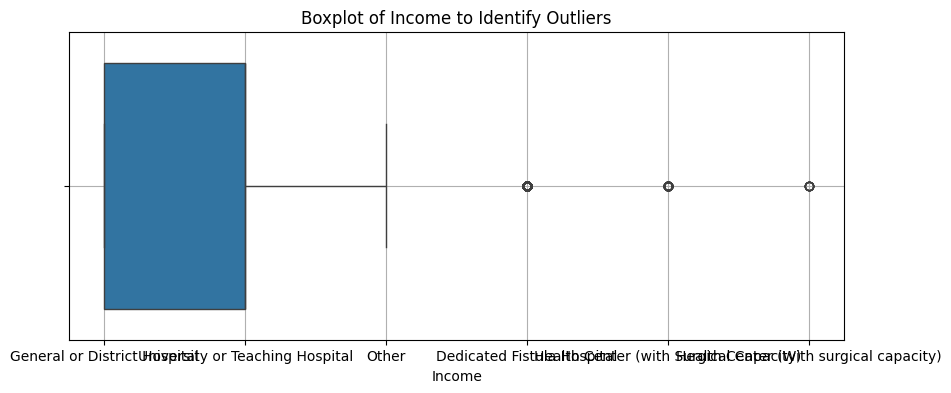

In [466]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['HealthCareLevel'])  # Replace 'df' with your DataFrame name
plt.title("Boxplot of Income to Identify Outliers")
plt.xlabel("Income")
plt.grid(True)
plt.show()